# Data Exploration

 **Import required Libs**

In [2]:
import seaborn as sns
from datasets import load_dataset
import pandas as pd
import ast
import matplotlib.pyplot as plt

**Load and Cleanse Data**

In [5]:

#loading of data
data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()

#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


# Filtering for just UK Data

In [6]:
df_uk = df[(df['job_country'] == 'United Kingdom') & (df['job_title_short'] == 'Data Analyst')]

**Replacing locations with United Kingdom or England**

In [17]:
df_uk.loc[df_uk['job_location'] == 'England, UK', 'job_location'] = 'Anywhere' #England is not accurately described as anywhere but used for simplification
df_uk.loc[df_uk['job_location'] == 'United Kingdom', 'job_location'] = 'Anywhere'


In [19]:
df_uk['job_location'].value_counts().head(10)

job_location
Anywhere                   3558
Manchester, UK              595
Birmingham, UK              440
Leeds, UK                   416
Edinburgh, UK               319
London, UK                  315
Glasgow, UK                 225
Newcastle upon Tyne, UK     194
Nottingham, UK              182
Liverpool, UK               173
Name: count, dtype: int64

In [21]:
df_plot = df_uk['job_location'].value_counts().head(10).to_frame()

In [23]:
df_plot

,count
job_location,
Anywhere,3558
"Manchester, UK",595
"Birmingham, UK",440
"Leeds, UK",416
"Edinburgh, UK",319
"London, UK",315
"Glasgow, UK",225
"Newcastle upon Tyne, UK",194
"Nottingham, UK",182


**Convert to seaborn**

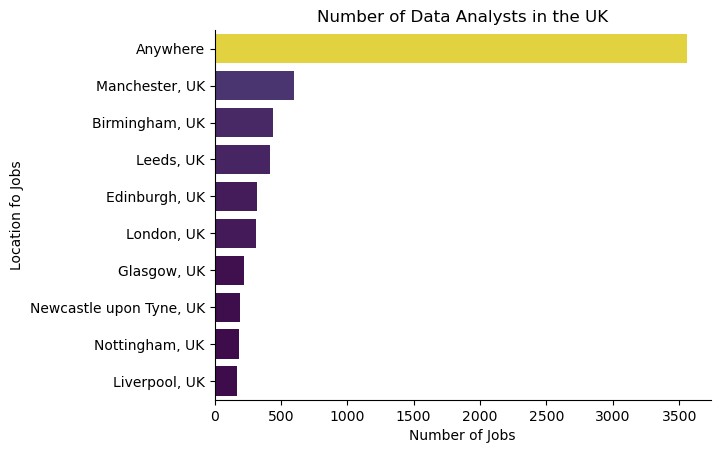

In [31]:
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='viridis', legend=False)
sns.despine()
plt.title('Number of Data Analysts in the UK')
plt.xlabel('Number of Jobs')
plt.ylabel('Location fo Jobs')
plt.show()

**Benefits of jobs**

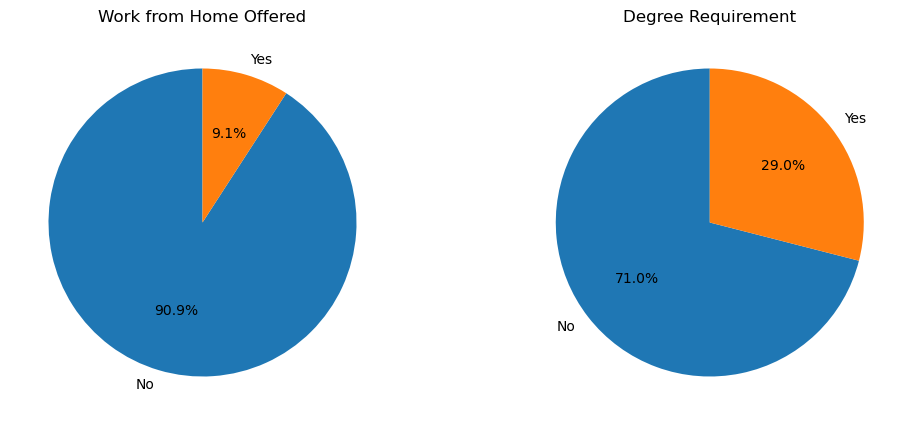

In [36]:
# rewrite the above with a for loop
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement'
    #'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 2)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_uk[column].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

# plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.show()


In [33]:
df_uk

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
74,Data Analyst,Data Entry/Economic Data Analyst,"Worcester, UK",via BeBee,Full-time,False,United Kingdom,2023-11-01 13:11:18,False,False,United Kingdom,None,NaN,NaN,ttgTalentSolutions,"[sql, r, python, tableau, power bi]","{'analyst_tools': ['tableau', 'power bi'], 'pr..."
97,Data Analyst,"Systems & Data Analyst - Exploitation, Missing...",Anywhere,via Totaljobs,Full-time and Contractor,False,United Kingdom,2023-12-04 13:14:01,True,False,United Kingdom,None,NaN,NaN,Solihull Metropolitan Borough Council,None,None
170,Data Analyst,Projects & Solutions Data Analyst (UK Pensions),"Birmingham, UK",via LinkedIn,Full-time,False,United Kingdom,2023-01-04 13:35:45,False,False,United Kingdom,None,NaN,NaN,Aon,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
206,Data Analyst,Business Intelligence / Data Analyst,Anywhere,via SonicJobs,Full-time,False,United Kingdom,2023-02-16 13:17:48,False,False,United Kingdom,None,NaN,NaN,Michael Page Technology,[tableau],{'analyst_tools': ['tableau']}
218,Data Analyst,Data and Strategy Analyst | Customer Success,Anywhere,via SimplyHired,Full-time,False,United Kingdom,2023-09-01 13:35:06,True,False,United Kingdom,None,NaN,NaN,DeepL SE,[sql],{'programming': ['sql']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784610,Data Analyst,Data Analyst,Anywhere,via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-21 06:40:29,True,False,United Kingdom,None,NaN,NaN,Totaljobs Group,[excel],{'analyst_tools': ['excel']}
784707,Data Analyst,Forensic Data Analyst,Anywhere,via Forensic.jobs,Full-time,False,United Kingdom,2023-10-11 06:11:04,True,False,United Kingdom,None,NaN,NaN,Premier Group Recruitment,None,None
784999,Data Analyst,HR Data Analyst,"Manchester, UK",via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-23 06:14:46,True,False,United Kingdom,None,NaN,NaN,Sainsbury's,None,None
785061,Data Analyst,Data Analyst,"Manchester, UK",via LinkedIn,Contractor,False,United Kingdom,2023-11-23 06:17:48,True,False,United Kingdom,None,NaN,NaN,Quooker UK,None,None
